In [ ]:
#Import Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #imported Seaborn with the alias sns
import plotly.express as px # library to create a pie chart in Python
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn import svm,datasets
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold,LeaveOneOut,ShuffleSplit
from sklearn import datasets

In [ ]:
df=pd.read_csv('/content/movies.csv')
df

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008
...,...,...,...,...,...,...,...,...
72,Across the Universe,romance,Independent,84,0.652603,54,$29.37,2007
73,A Serious Man,Drama,Universal,64,4.382857,89,$30.68,2009
74,A Dangerous Method,Drama,Independent,89,0.448645,79,$8.97,2011
75,27 Dresses,Comedy,Fox,71,5.343622,40,$160.31,2008


In [ ]:
df.info()
# information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               77 non-null     object 
 1   Genre              77 non-null     object 
 2   Lead Studio        77 non-null     object 
 3   Audience score %   77 non-null     int64  
 4   Profitability      77 non-null     float64
 5   Rotten Tomatoes %  77 non-null     int64  
 6   Worldwide Gross    77 non-null     object 
 7   Year               77 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 4.9+ KB


In [ ]:
data_cleaned = df.dropna()
data_cleaned

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008
...,...,...,...,...,...,...,...,...
72,Across the Universe,romance,Independent,84,0.652603,54,$29.37,2007
73,A Serious Man,Drama,Universal,64,4.382857,89,$30.68,2009
74,A Dangerous Method,Drama,Independent,89,0.448645,79,$8.97,2011
75,27 Dresses,Comedy,Fox,71,5.343622,40,$160.31,2008


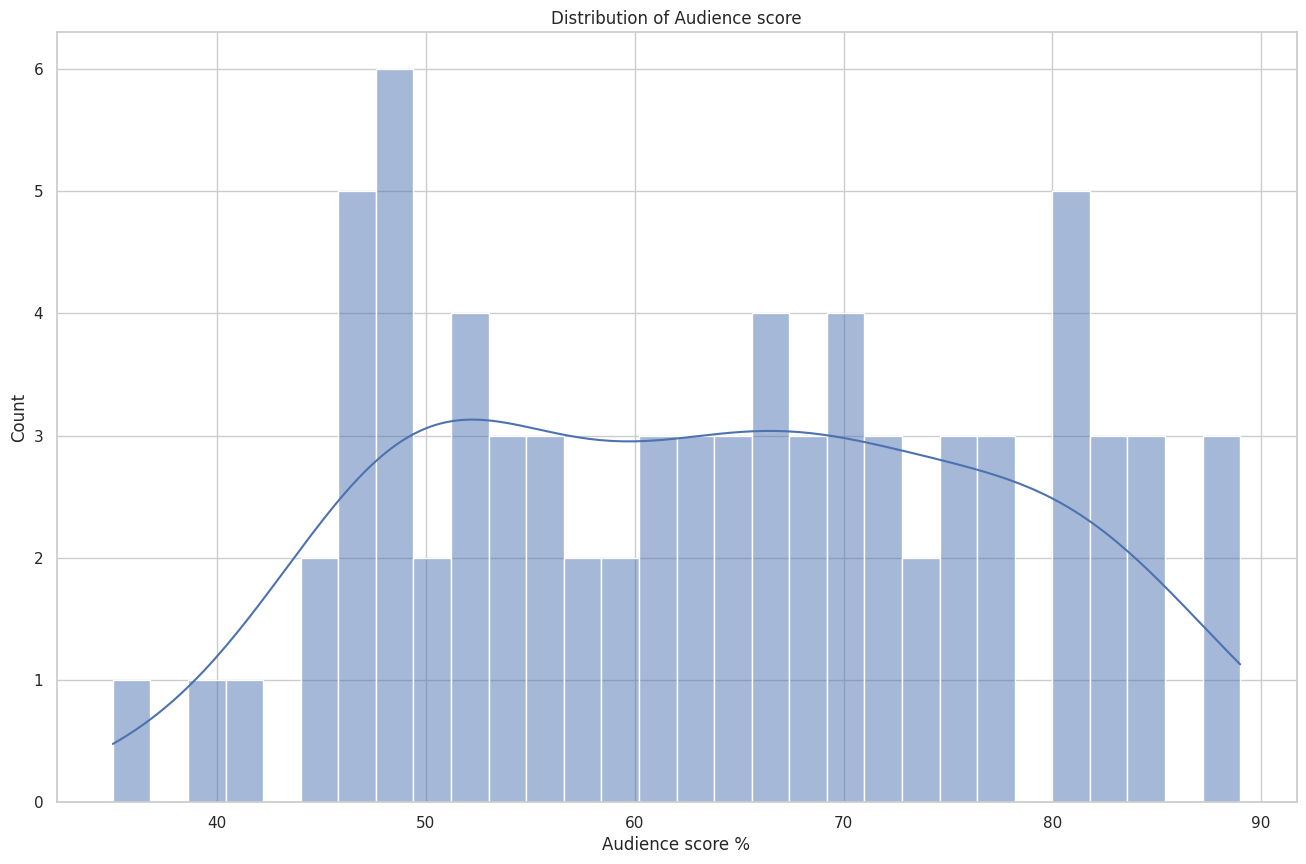

In [ ]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")


plt.figure(figsize=(16, 10))
sns.histplot(data_cleaned['Audience score %'], bins=30, kde=True)
plt.title('Distribution of Audience score')
plt.show()



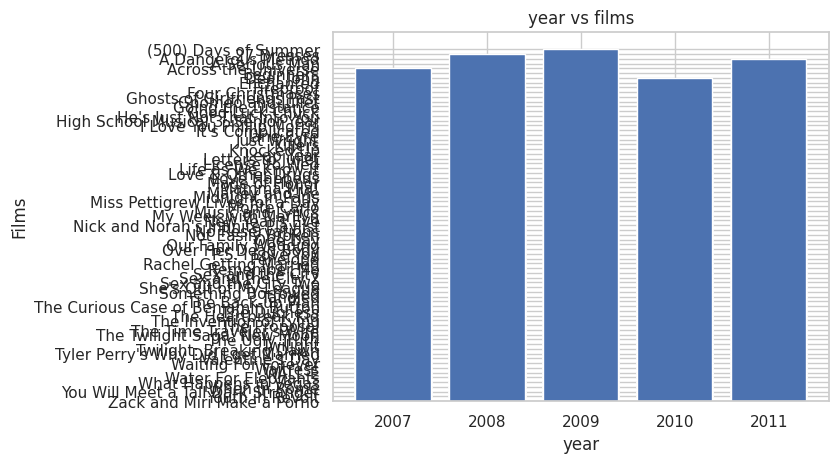

In [ ]:
x=data_cleaned["Year"]
y=data_cleaned["Film"]
plt.bar(x, y)
plt.xlabel("year")
plt.ylabel("Films")
plt.title("year vs films")
plt.show()

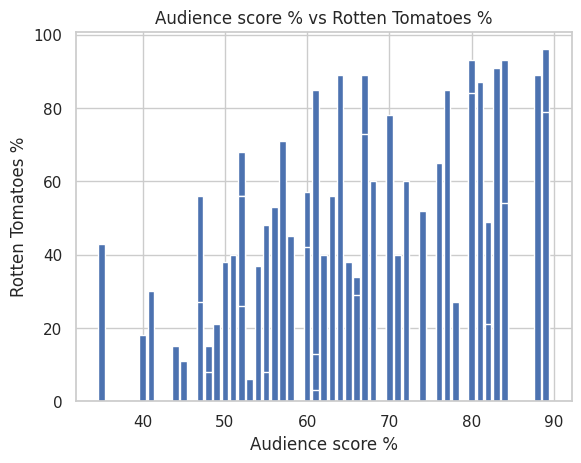

In [ ]:
x=data_cleaned["Audience score %"]
y=data_cleaned["Rotten Tomatoes %"]
plt.bar(x, y)
plt.xlabel("Audience score %")
plt.ylabel("Rotten Tomatoes %")
plt.title("Audience score % vs Rotten Tomatoes %")
plt.show()

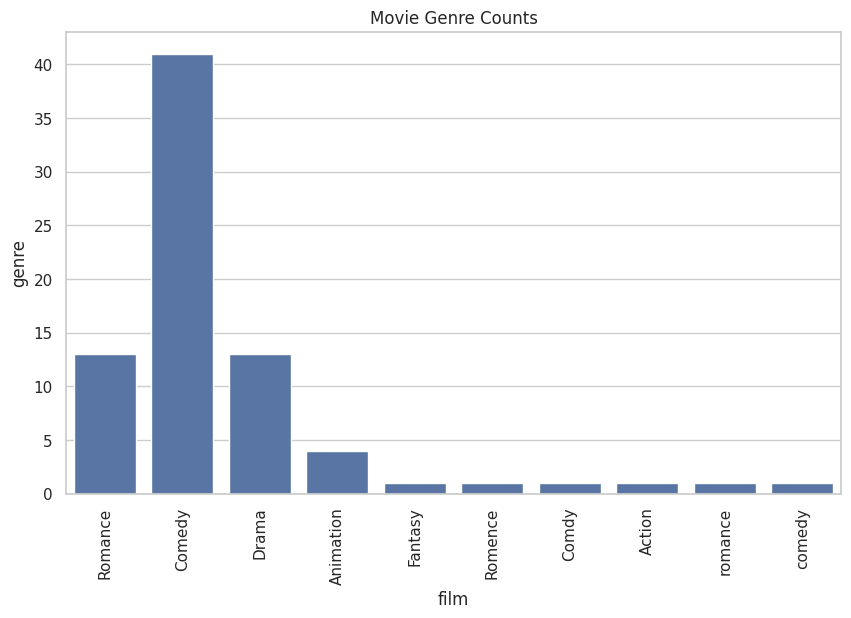

In [ ]:
#Bar plot
plt.figure(figsize=(10,6))
sns.countplot(data=data_cleaned, x='Genre')
plt.title('Movie Genre Counts')
plt.xticks(rotation=90)
plt.xlabel('film')
plt.ylabel('genre')
plt.show()

<Axes: >

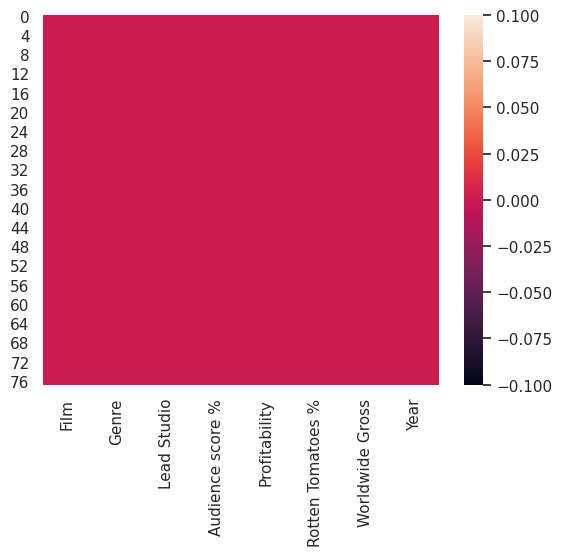

In [ ]:
sns.heatmap(df.isnull())

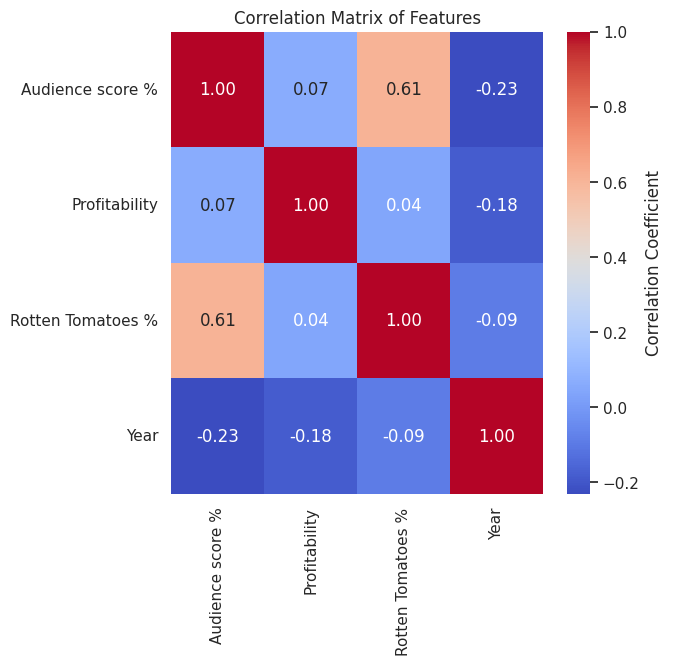

In [ ]:
# Calculate and plot the correlation matrix
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Features')
plt.show()